In [1]:
# !pip install pandas
# !pip install sklearn
# !pip install scipy
# !pip install pandas_profiling
# !pip install tabulate
# !pip install matplotlib
# ! pip install plotly

In [2]:
import pandas as pd 
import numpy as np
import statistics as st
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import seaborn as sns
import datetime as dt
import folium

# Read Data

In [3]:
# Read csv file 
# PARAMATER: csv file name
# returns pandas dataframe 

def read_csv(fname):
    data =  pd.read_csv(fname, low_memory = False)
    # Fill missing values with NaN
    data = data.replace(" ", np.nan)
    data = data.replace("", np.nan)
    return data


data = read_csv("boston_crime_2021.csv")
data.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,212021001,619,NaN,LARCENY ALL OTHERS,B2,181,0,2021-01-01 00:00:00,2021,1,Friday,0,NaN,ALLERTON ST & MAGAZINE ST\nROXBURY MA 02119\n...,42.327551,-71.069162,"(42.327550999587764, -71.0691619893362)"
1,212025963,3201,NaN,PROPERTY - LOST/ MISSING,B3,465,0,2021-01-01 00:00:00,2021,1,Friday,0,NaN,WHITFIELD ST,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
2,212022379,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,C6,574,0,2021-01-01 00:00:00,2021,1,Friday,0,NaN,MARINE RD,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)"
3,212019050,615,NaN,LARCENY THEFT OF MV PARTS & ACCESSORIES,A1,77,0,2021-01-01 00:00:00,2021,1,Friday,0,NaN,STANIFORD ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)"
4,212019422,3115,NaN,INVESTIGATE PERSON,B3,355,0,2021-01-01 00:00:00,2021,1,Friday,0,NaN,FULLER ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)"


# Determine Column Counts for Numeric and Object Columns

Using the columns from the input CSV file, determine if data is categorical or numerical and based on domain knowledge determine if imputing is the best strategy. 

In [4]:
data_types_df = pd.DataFrame(columns = ['column', 'dtype_label', 'impute'])
data_types_df['column'] = data.columns
data_types_df['dtype_label'] = 'categorical'
# 0 = no impute, 1 = impute
data_types_df['impute'] = 0
data_types_df

,column,dtype_label,impute
0,INCIDENT_NUMBER,categorical,0
1,OFFENSE_CODE,categorical,0
2,OFFENSE_CODE_GROUP,categorical,0
3,OFFENSE_DESCRIPTION,categorical,0
4,DISTRICT,categorical,0
5,REPORTING_AREA,categorical,0
6,SHOOTING,categorical,0
7,OCCURRED_ON_DATE,categorical,0
8,YEAR,categorical,0
9,MONTH,categorical,0


In [5]:
# Extract all numeric columns of dataframe 
# PARAMETER: pandas dataframe
# returns pandas dataframe

def extract_numeric_cols(df):
    return(df[df['dtype_label'] == 'numeric'])

# NUMERIC COLUMNS
numeric_cols = extract_numeric_cols(data_types_df)
if(len(numeric_cols) > 0):
    print("Numeric Columns:", "\n", numeric_cols.columns, "\n")
else:
    print("No Numeric Columns in Dataset")



No Numeric Columns in Dataset


In [6]:
# Extract all object columns of dataframe 
# PARAMETER: pandas dataframe
# returns pandas dataframe

def extract_object_cols(df):
    return(df[df['dtype_label'] == 'categorical'])


#OBJECT COLUMNS
object_cols = extract_object_cols(data_types_df)
if (len(object_cols) > 0):
    columns = object_cols['column']
    print("Object Columns:", "\n", object_cols, "\n")
else: 
    print("No Object Columns in Dataset")


Object Columns: 
                  column  dtype_label  impute
0       INCIDENT_NUMBER  categorical       0
1          OFFENSE_CODE  categorical       0
2    OFFENSE_CODE_GROUP  categorical       0
3   OFFENSE_DESCRIPTION  categorical       0
4              DISTRICT  categorical       0
5        REPORTING_AREA  categorical       0
6              SHOOTING  categorical       0
7      OCCURRED_ON_DATE  categorical       0
8                  YEAR  categorical       0
9                 MONTH  categorical       0
10          DAY_OF_WEEK  categorical       0
11                 HOUR  categorical       0
12             UCR_PART  categorical       0
13               STREET  categorical       0
14                  Lat  categorical       0
15                 Long  categorical       0
16             Location  categorical       0 



Determine column counts for entire dataset 

In [7]:
# Determine the number of missing values and the missing percentage
# PARAMETER: pandas dataframe
# returns pandas dataframe 

def determine_column_counts(df):
    columns = df.columns
    data_counts = pd.DataFrame(columns = ['column_name','column_type','num_rows','distinct_data', 'distinct_percent', 'missing_data', 'missing_percentage'])
    
    #For each column, calculate number and percentage of missing rows and distinct counts
    for col in columns:
        col_vals = df[col]
        total_data = len(col_vals)
        col_missing = sum(col_vals.isnull())
        missing_percent = round((col_missing / len(df[col])) * 100 , 3)
        col_distinct = (col_vals.nunique())
        distinct_percent = round((col_distinct / len(df[col])) * 100 , 3)
        
        # Append current col and caluclations to missing_data df if column has missing rows 
        if missing_percent > 0:
            data_counts.loc[len(data_counts)] = [col, col_vals.dtype, total_data, col_distinct, distinct_percent, col_missing, missing_percent]
        
#     print(tabulate(data_counts, headers="keys", tablefmt="pipe"), "\n")
    return(data_counts)

missing_data = determine_column_counts(data)
missing_data

,column_name,column_type,num_rows,distinct_data,distinct_percent,missing_data,missing_percentage
0,OFFENSE_CODE_GROUP,float64,71721,0,0.000,71721,100.000
1,DISTRICT,object,71721,13,0.018,993,1.385
2,REPORTING_AREA,object,71721,871,1.214,16643,23.205
3,UCR_PART,float64,71721,0,0.000,71721,100.000
4,STREET,object,71721,8102,11.297,679,0.947
5,Lat,float64,71721,12598,17.565,2890,4.030
6,Long,float64,71721,12598,17.565,2890,4.030
7,Location,object,71721,12598,17.565,2890,4.030


### Object Columns: 
    INCIDENT_NUMBER,OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, OCCURRED_ON_DATE, DAY_OF_WEEK, STREET, Location, OFFENSE_CODE, OFFENSE_CODE_GROUP, YEAR, MONTH,HOUR, UCR_PART, LAT, LONG
   
### Numeric Columns:
    No columns in this dataset should be treated like a numeric column
   
## Missing Data

For numeric columns with missing values, imputation can be used to fill in these rows. For example, mean, median, or mode imputation can be utilized. This technique will fill any missing values with the specified statistic. If mode imputation is selected, the mode value of the column will used to fill in any missing values. Other possible techniques can include Linear Regression or K-Nearest Neighbors (KNN) Imputation. These techniques allow for slighlty more complex relationships to be utilzied when imputing missing values. Linear Regression Imputation can be used when there is a linear relationship between the missing variable and another well-defined variable in the dataset. KNN Imputation can allow for the consideration of similar samples to impute any missing data. This technique will impute missing values with the average of the KNN values. 

For object coumns there are similar techniques that can be utilized to impute missing values. Mode imputation is a simple approach that fills missing values with the mode category of the column. If mode imputation does not suit the needs of the dataset, constant value imputation can be used, where a predefined value is used to represent missing data. More complex methods like predicitive modeling and KNN can also be used to impute missing values. 

The method chosen for imputing values depends on the use case for a specific dataset and the type of information desired. 


In [8]:
def generate_cleaning_strategies(df, missing_data, data_types_df,  zscore_threshold=3, outlier_handling_method='drop'):
    cleaning_strategies = {}
    categorical_data = pd.DataFrame()
    numeric_data = pd.DataFrame()

    # Extract categorical and numeric data based on data_types_df - only use columns that have missing data
    categorical_columns = data_types_df['column'].loc[data_types_df['dtype_label'] == 'categorical']
    for col in categorical_columns:
        if col in missing_data['column_name'].values:
            categorical_data[col] = df[col]
     
    numeric_columns = data_types_df['column'].loc[data_types_df['dtype_label'] == 'numeric']
    for col in numeric_columns:
        if col in missing_data['column_name'].values:
            numeric_data[col] = df[col]

    # Cleaning strategies for categorical data
    for column in categorical_data:
        missing_percentage = (df[column].isnull().sum() / len(df)) * 100
        distinct_percentage = (df[column].nunique() / len(df)) * 100
        if missing_percentage >= 50:
            cleaning_strategies[column] = ['Remove column', 'High missing percentage']
        elif missing_percentage < 5:
            cleaning_strategies[column] = ['Remove rows with missing values', 'Low missing rate']
        elif distinct_percentage >= 90:
            cleaning_strategies[column] = ['Remove rows with missing values', 'High distinct percentage']
        else:
            cleaning_strategies[column] = ['Impute missing values with Unknown', '']
    
    # Cleaning strategies for numeric data   
    for column in numeric_data:
        missing_percentage = (df[column].isnull().sum() / len(df)) * 100

        if missing_percentage >= 50:
            cleaning_strategies[column] = ['Remove column', 'High missing percentage']
        elif missing_percentage < 5:
            cleaning_strategies[column] = ['Remove rows with missing values', 'Low missing rate']
        else:
            cleaning_strategies[column] = ['Impute missing values with median', '']

        # Add outlier detection and handling strategies to the cleaning strategies
        if outlier_handling_method == 'drop':
            cleaning_strategies[column].append('Drop rows with outliers')
        elif outlier_handling_method == 'replace_with_median':
        
            cleaning_strategies[column].append('Replace outliers with median')
        # Default outlier handling strategy
        else:
            cleaning_strategies[column].append('Replace outliers with NaN')
            
    

    return cleaning_strategies


In [9]:
#Data Cleaning Strategies
cleaning_strategies = generate_cleaning_strategies(data, missing_data, data_types_df)

#Create Data Cleaning Strategies DF 
cleaning_strategies_table = [[column, strategy[0], strategy[1]] for column, strategy in cleaning_strategies.items()]
headers = ["Column", "Cleaning Strategy", "Reason"]
cleaning_strategies_df = pd.DataFrame(cleaning_strategies_table, columns = headers)

cleaning_strategies_df

,Column,Cleaning Strategy,Reason
0,OFFENSE_CODE_GROUP,Remove column,High missing percentage
1,DISTRICT,Remove rows with missing values,Low missing rate
2,REPORTING_AREA,Impute missing values with Unknown,
3,UCR_PART,Remove column,High missing percentage
4,STREET,Remove rows with missing values,Low missing rate
5,Lat,Remove rows with missing values,Low missing rate
6,Long,Remove rows with missing values,Low missing rate
7,Location,Remove rows with missing values,Low missing rate


Strategies for columns that contain missing values. 

In [10]:
#Applies appropriate cleaning strategy for each column 
# PARAMETER: dataframe, specific column to be cleaned, cleaning stragtegy for column 

def apply_cleaning_strategy(df, column, cleaning_strategy):
    if cleaning_strategy == 'Remove column':
        df.drop(column, axis=1, inplace=True)
    elif cleaning_strategy == 'Remove rows with missing values':
        df.dropna(subset=[column], inplace=True)
    elif cleaning_strategy == 'Impute missing values with Unknown':
        df[column].fillna("Unknown", inplace=True)
    elif cleaning_strategy == 'Impute missing values with median':
        df[column].fillna(df[column].median(), inplace=True)
    elif cleaning_strategy == 'Drop rows with outliers':
        df = df[~detect_outliers_zscore(df[column])]
    elif cleaning_strategy == 'Replace outliers with median':
        df.loc[detect_outliers_zscore(df[column]), column] = df[column].median()
    elif cleaning_strategy == 'Replace outliers with NaN':
        df.loc[detect_outliers_zscore(df[column]), column] = np.nan

    return df


def clean_data(df, cleaning_strategies):
    for column, strategy in cleaning_strategies.items():
        df = apply_cleaning_strategy(df, column, strategy[0])

    return df


def detect_outliers_zscore(column_data, threshold=3):
    # Calculate Z-score for the column
    z_scores = np.abs((column_data - column_data.mean()) / column_data.std())
    return z_scores > threshold


#Clean Data According to cleaning strategies 
cleaned_data = clean_data(data, cleaning_strategies)
cleaned_data.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,212021001,619,LARCENY ALL OTHERS,B2,181,0,2021-01-01 00:00:00,2021,1,Friday,0,ALLERTON ST & MAGAZINE ST\nROXBURY MA 02119\n...,42.327551,-71.069162,"(42.327550999587764, -71.0691619893362)"
1,212025963,3201,PROPERTY - LOST/ MISSING,B3,465,0,2021-01-01 00:00:00,2021,1,Friday,0,WHITFIELD ST,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
2,212022379,1102,FRAUD - FALSE PRETENSE / SCHEME,C6,574,0,2021-01-01 00:00:00,2021,1,Friday,0,MARINE RD,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)"
3,212019050,615,LARCENY THEFT OF MV PARTS & ACCESSORIES,A1,77,0,2021-01-01 00:00:00,2021,1,Friday,0,STANIFORD ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)"
4,212019422,3115,INVESTIGATE PERSON,B3,355,0,2021-01-01 00:00:00,2021,1,Friday,0,FULLER ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)"
5,212058122,1102,FRAUD - FALSE PRETENSE / SCHEME,B2,282,0,2021-01-01 00:00:00,2021,1,Friday,0,WASHINGTON ST,42.328663,-71.085634,"(42.32866283555608, -71.08563401183545)"
6,212032563,1102,FRAUD - FALSE PRETENSE / SCHEME,B3,465,0,2021-01-01 00:00:00,2021,1,Friday,0,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
7,212006298,1107,FRAUD - IMPERSONATION,C11,355,0,2021-01-01 00:00:00,2021,1,Friday,0,RIDGEWOOD ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)"
8,212008707,1102,FRAUD - FALSE PRETENSE / SCHEME,B3,691,0,2021-01-01 00:00:00,2021,1,Friday,0,GREENOCK ST,42.287094,-71.148221,"(42.28709355259107, -71.14822128377165)"
9,212000092,1402,VANDALISM,A1,86,0,2021-01-01 00:00:00,2021,1,Friday,0,SALEM ST,42.363398,-71.056002,"(42.36339790491148, -71.05600208188557)"


In [11]:
#Check to see if any missing data left 
missing_data = determine_column_counts(cleaned_data)
if len(missing_data) > 0:
    missing_data
else:
    print("No missing data in dataframe")

No missing data in dataframe


##### The data is now cleaned as there is no missing data.

In [12]:
# Read in CSV File to map Boston District Codes to Boston Towns 
code_to_name = pd.read_csv("boston_district_codes.csv", dtype='object')

cleaned_data['DISTRICT_NAME'] = cleaned_data['DISTRICT'].map(code_to_name.set_index('CODE')['DISTRICT'])

cleaned_data.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,DISTRICT_NAME
0,212021001,619,LARCENY ALL OTHERS,B2,181,0,2021-01-01 00:00:00,2021,1,Friday,0,ALLERTON ST & MAGAZINE ST\nROXBURY MA 02119\n...,42.327551,-71.069162,"(42.327550999587764, -71.0691619893362)",Roxbury
1,212025963,3201,PROPERTY - LOST/ MISSING,B3,465,0,2021-01-01 00:00:00,2021,1,Friday,0,WHITFIELD ST,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)",Mattapan
2,212022379,1102,FRAUD - FALSE PRETENSE / SCHEME,C6,574,0,2021-01-01 00:00:00,2021,1,Friday,0,MARINE RD,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)",South Boston
3,212019050,615,LARCENY THEFT OF MV PARTS & ACCESSORIES,A1,77,0,2021-01-01 00:00:00,2021,1,Friday,0,STANIFORD ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)",Downtown
4,212019422,3115,INVESTIGATE PERSON,B3,355,0,2021-01-01 00:00:00,2021,1,Friday,0,FULLER ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)",Mattapan


# Univariate Analysis

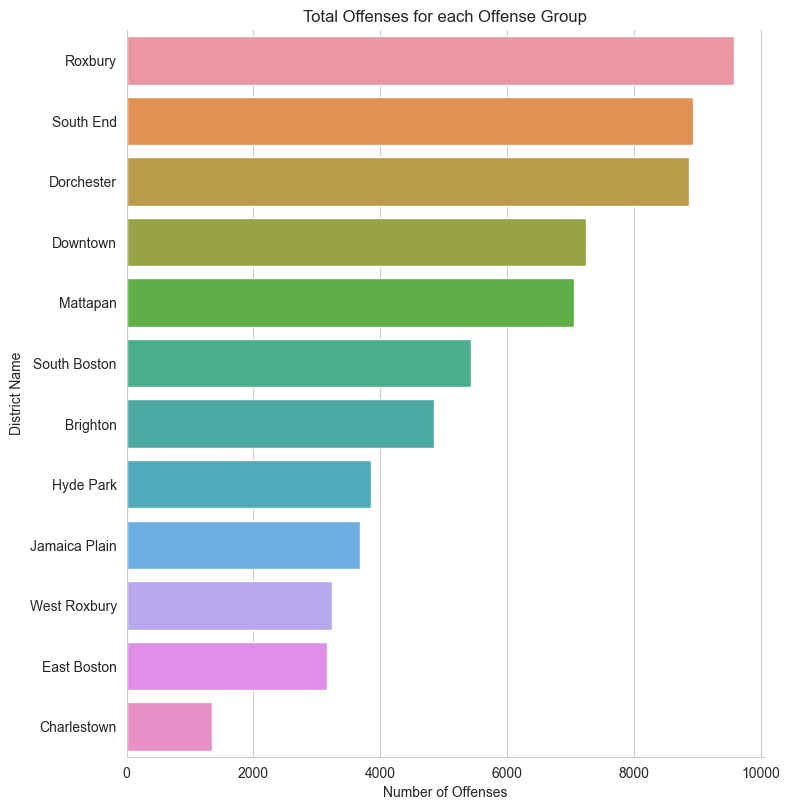

In [13]:
# Set the style and font scale
sns.set_style("whitegrid")

# Calculate value counts for 'DISTRICT_NAME'
district_counts = cleaned_data['DISTRICT_NAME'].value_counts().reset_index()
district_counts.columns = ['DISTRICT_NAME', 'Number of Offenses']

# Create the bar plot
viz1 = sns.catplot(x='Number of Offenses', y ='DISTRICT_NAME', height=8, kind='bar', data=district_counts)

# Set plot titles and labels
plt.title('Total Offenses for each Offense Group')
plt.xlabel('Number of Offenses')
plt.ylabel('District Name')

plt.show()

Roxbury, Sourth End, and Dorhcester have the highest number of crimes reported.

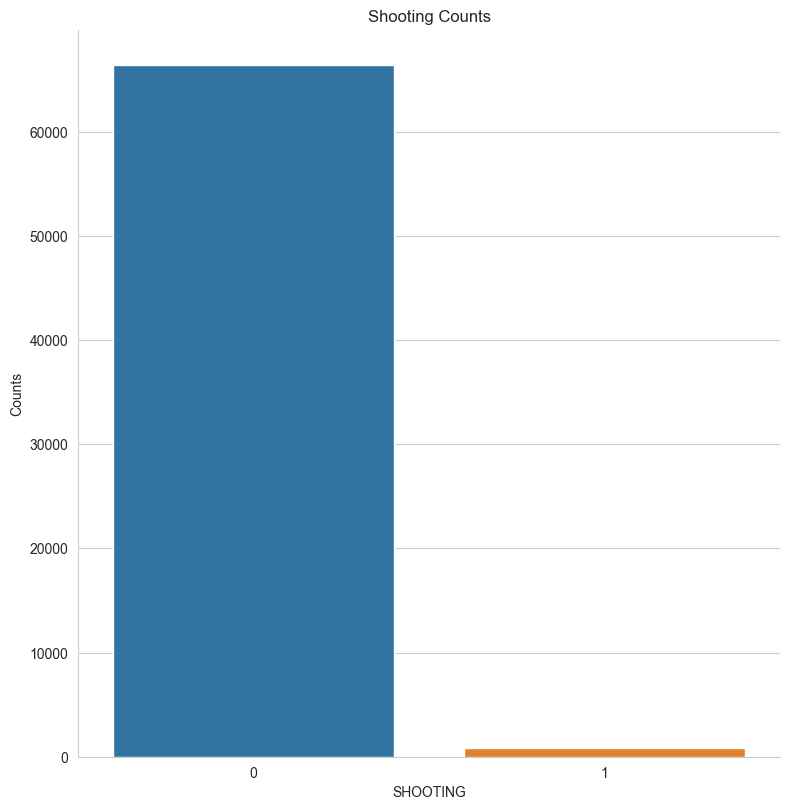

In [14]:
# Set the style and font scale
sns.set_style("whitegrid")

# Calculate value counts for 'SHOOTING'
shooting_counts = cleaned_data['SHOOTING'].value_counts().reset_index()
shooting_counts.columns = ['SHOOTING', 'Number of Shootings']

# Create the bar plot
viz1 = sns.catplot(x='SHOOTING', y ='Number of Shootings', height=8, kind='bar', data=shooting_counts)

# Set plot titles and labels
plt.title('Shooting Counts')
plt.ylabel('Counts')

plt.show()


The majority of the crimes reported do not involve shootings. 

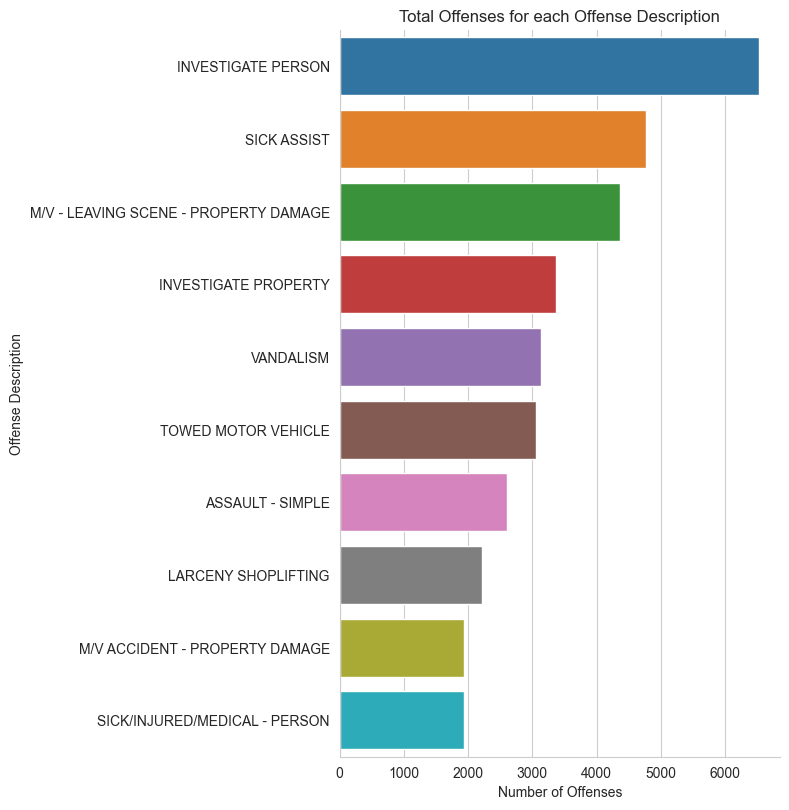

In [15]:
# Set the style and font scale
sns.set_style("whitegrid")

# Calculate value counts for 'OFFENSE_DESCRIPTION'
offense_counts = cleaned_data['OFFENSE_DESCRIPTION'].value_counts().reset_index()
offense_counts.columns = ['OFFENSE_DESCRIPTION', 'Number of Offenses']

# Sort the DataFrame by 'Number of Offenses' and select the top 10
top_offenses = offense_counts.sort_values(by='Number of Offenses', ascending=False).head(10)

# Create the bar plot
viz1 = sns.catplot(x='Number of Offenses', y ='OFFENSE_DESCRIPTION', height=8, kind='bar', data=top_offenses)

# Set plot titles and labels
plt.title('Total Offenses for each Offense Description')
plt.xlabel('Number of Offenses')
plt.ylabel('Offense Description')

plt.show()

The most common types of offenses include investigating person, a sick assist, and motor vehicle leaving scene/ property damage. 

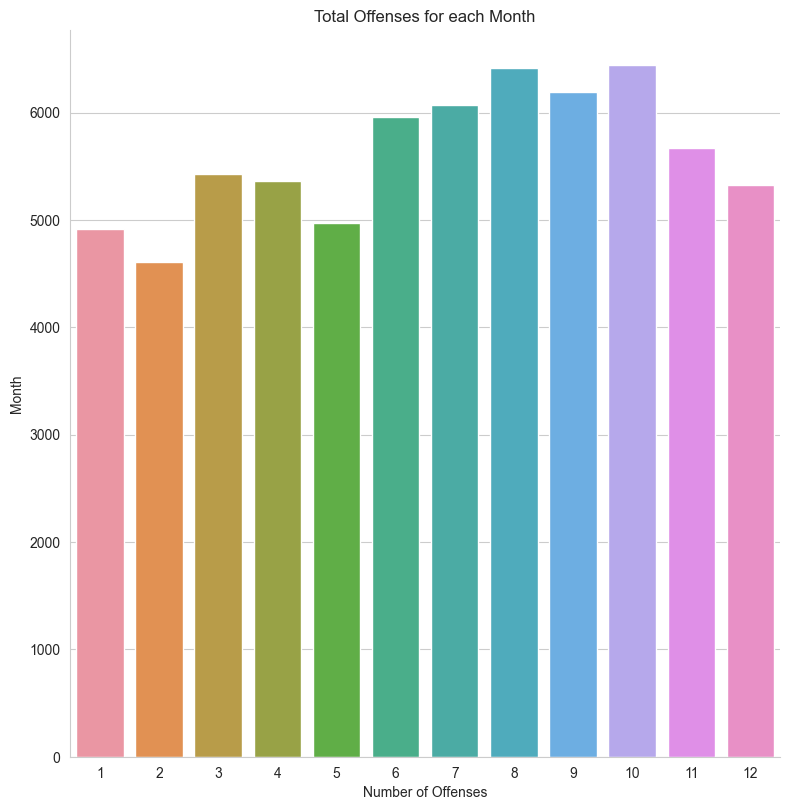

In [16]:
# Set the style and font scale
sns.set_style("whitegrid")

# Calculate value counts for 'MONTH'
month_counts = cleaned_data['MONTH'].value_counts().reset_index()
month_counts.columns = ['MONTH', 'Number of Offenses per Month']

# Create the bar plot
viz1 = sns.catplot(x='MONTH', y ='Number of Offenses per Month', height=8, kind='bar', data=month_counts)

# Set plot titles and labels
plt.title('Total Offenses for each Month')
plt.xlabel('Number of Offenses')
plt.ylabel('Month')

plt.show()

The number of crimes reported seems fairly uniform across the different months of the year

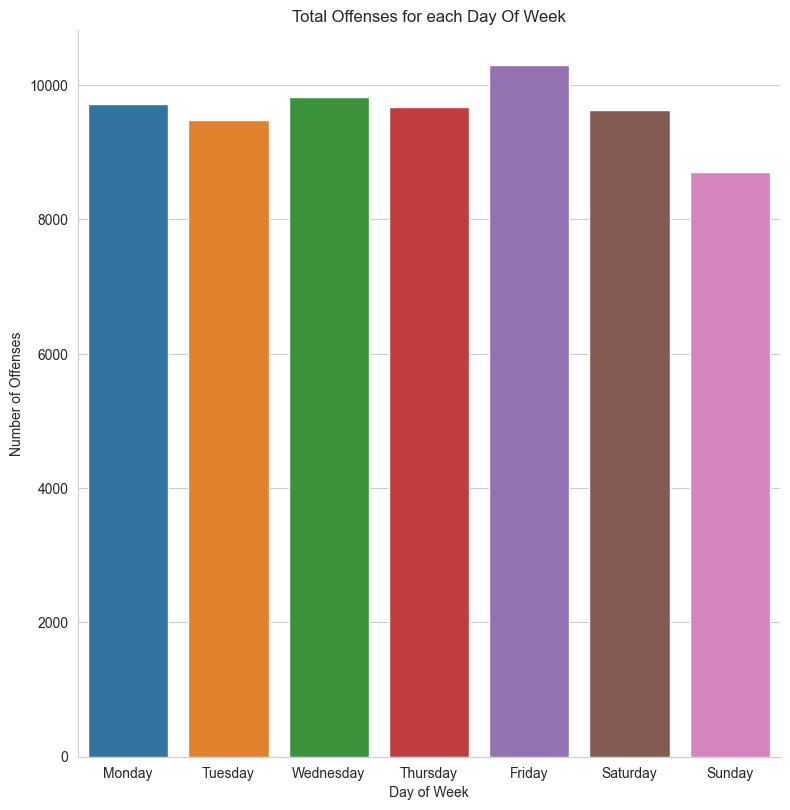

In [17]:
# Set the style and font scale
sns.set_style("whitegrid")

# Define the desired order of days of the week
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate value counts for 'DAY_OF_WEEK'
dow_counts = cleaned_data['DAY_OF_WEEK'].value_counts().reset_index()
dow_counts.columns = ['DAY_OF_WEEK', 'Number of Offenses per Day Of Week']

# Create the bar plot with the custom order
viz1 = sns.catplot(x='DAY_OF_WEEK', y='Number of Offenses per Day Of Week', height=8, kind='bar', data=dow_counts, order=custom_order)

# Set plot titles and labels
plt.title('Total Offenses for each Day Of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Offenses')

plt.show()

Crime seems to be fairly uniform across the days of the week of the year.

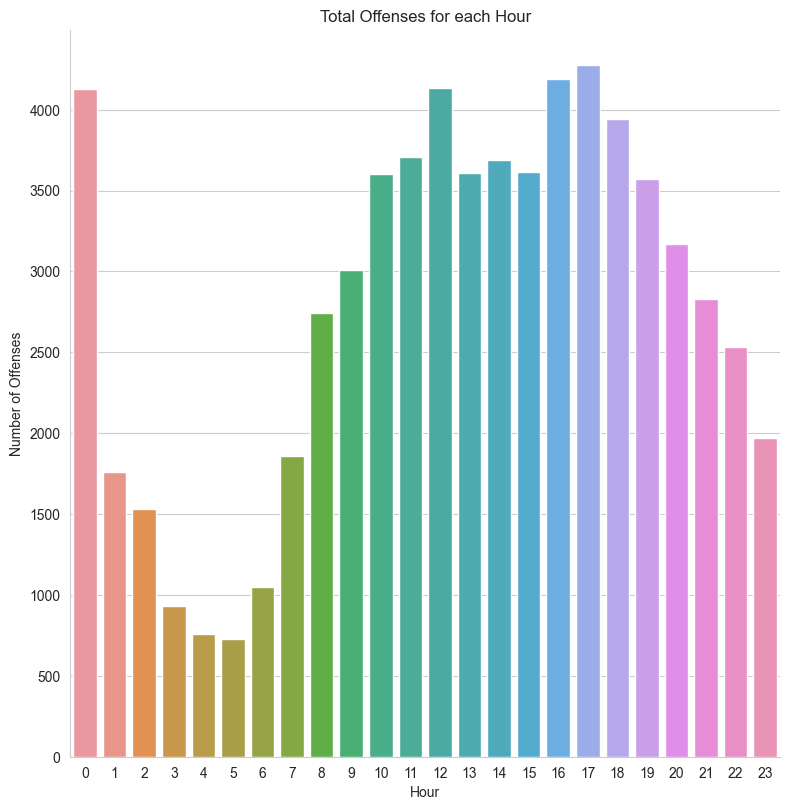

In [18]:
# Set the style and font scale
sns.set_style("whitegrid")

# Calculate value counts for 'HOUR'
hour_counts = cleaned_data['HOUR'].value_counts().reset_index()
hour_counts.columns = ['HOUR', 'Number of Offenses per Hour']

# Create the bar plot with the custom order
viz1 = sns.catplot(x='HOUR', y='Number of Offenses per Hour', height=8, kind='bar', data=hour_counts)

# Set plot titles and labels
plt.title('Total Offenses for each Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Offenses')

plt.show()

Crime tends to be lower from 3:00 - 6:00 with the peak hours being 16:00-18:00 and around 0:00

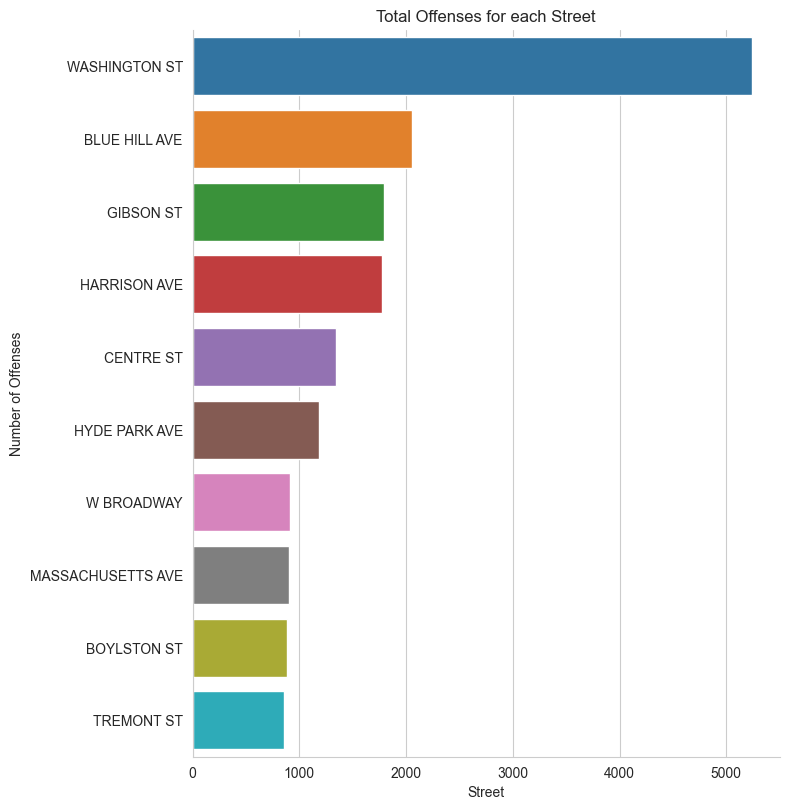

In [19]:
# Set the style and font scale
sns.set_style("whitegrid")

# Calculate value counts for 'Street'
street_counts = cleaned_data['STREET'].value_counts().reset_index()
street_counts.columns = ['STREET', 'Number of Offenses per Street']

# Sort the DataFrame by 'Number of Offenses per Street' and select the top 10
top_streets = street_counts.sort_values(by='Number of Offenses per Street', ascending=False).head(10)

# Create the bar plot with the custom order
viz1 = sns.catplot(x='Number of Offenses per Street', y='STREET', height=8, kind='bar', data=top_streets)

# Set plot titles and labels
plt.title('Total Offenses for each Street')
plt.xlabel('Street')
plt.ylabel('Number of Offenses')

plt.show()

Washington Street significantly has the highest reported crimes.

In [20]:
loc_counts = pd.DataFrame()
loc_counts['Location'] = cleaned_data['Location'].value_counts().index
loc_counts['Lat'] =  cleaned_data['Lat'].value_counts().index
loc_counts['Long'] =  cleaned_data['Long'].value_counts().index
loc_counts['Counts'] =cleaned_data['Location'].value_counts().values

loc_counts.head(5)

fig = px.density_mapbox(loc_counts, lat='Lat', lon='Long', z='Counts',
                        mapbox_style="stamen-terrain", zoom = 10)
 
# fig

In [21]:
bos_map = folium.Map(location = ['42.361145', '-71.057083'], zoom_start=13)

In [22]:
offense_description = folium.map.FeatureGroup()
for lat, long in zip(cleaned_data.Lat, cleaned_data.Long):
    offense_description.add_child(
        folium.CircleMarker(
            [lat,long],
            radius = 5,
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.5
        )
    )
# bos_map.add_child(offense_description)

### Conclusions 

* The Districts with the highest crimes reported are Roxbury, Sourth End, and Dorhcester
* The majority of crimes do not involve shootings
* The most common type of crime is Investigating Person
* Washington Street has the highest number of crimes reported

### Bivariate Analysis

In [23]:
# Create a dataframe with the top 5 offense descriptions and count the number of instances per month
top_5_offense = cleaned_data[
    (cleaned_data['OFFENSE_DESCRIPTION'] == 'INVESTIGATE PERSON') |
    (cleaned_data['OFFENSE_DESCRIPTION'] == 'SICK ASSIST') |
    (cleaned_data['OFFENSE_DESCRIPTION'] == 'M/V - LEAVING SCENE - PROPERTY DAMAGE') |
    (cleaned_data['OFFENSE_DESCRIPTION'] == 'INVESTIGATE PROPERTY') |
    (cleaned_data['OFFENSE_DESCRIPTION'] == 'VANDALISM')
]
monthly_counts = top_5_offense.groupby(['MONTH', 'OFFENSE_DESCRIPTION']).size().reset_index(name='offense_description_count')


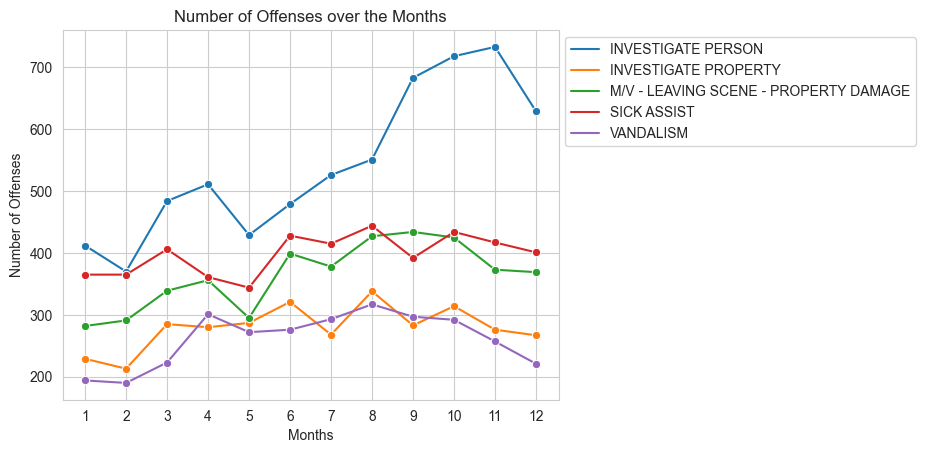

In [24]:
# Plot the counts of the top 5 offense descriptions per month 
fig = plt.gcf()

ax = sns.lineplot(x="MONTH", y="offense_description_count",
                  hue="OFFENSE_DESCRIPTION", marker='o', errorbar=None, data=monthly_counts)
ax.legend(bbox_to_anchor=(1,1))
plt.title('Number of Offenses over the Months')
plt.xticks(np.arange(1,13, step = 1))
plt.xlabel('Months')
plt.ylabel('Number of Offenses')
plt.show()

Looking at the top 5 offense desriptions found earlier, the trends of each offense throughout the year can be mapped. Investigate Person seems to overall be the highest offense, with the highest number of reports in months 9 - 12. 

In [25]:
# Create an hourly count for the top 5 offenses 
hourly_counts = top_5_offense.groupby(['HOUR', 'OFFENSE_DESCRIPTION']).size().reset_index(name='offense_description_count')
hourly_counts

,HOUR,OFFENSE_DESCRIPTION,offense_description_count
0,0,INVESTIGATE PERSON,433
1,0,INVESTIGATE PROPERTY,213
2,0,M/V - LEAVING SCENE - PROPERTY DAMAGE,209
3,0,SICK ASSIST,262
4,0,VANDALISM,190
...,...,...,...
115,23,INVESTIGATE PERSON,186
116,23,INVESTIGATE PROPERTY,132
117,23,M/V - LEAVING SCENE - PROPERTY DAMAGE,163
118,23,SICK ASSIST,134


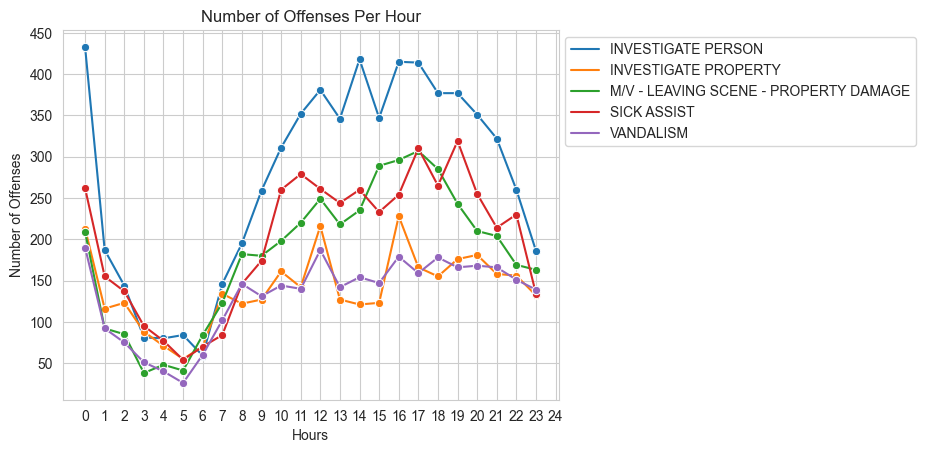

In [26]:
fig = plt.gcf()

ax = sns.lineplot(x="HOUR", y="offense_description_count",
                  hue="OFFENSE_DESCRIPTION", marker='o', errorbar=None, data=hourly_counts)
ax.legend(bbox_to_anchor=(1,1))
plt.title('Number of Offenses Per Hour')
plt.xticks(np.arange(0,25, step = 1))
plt.xlabel('Hours')
plt.ylabel('Number of Offenses')
plt.show()

Across the top 5 offense descriptions, they all seem to follow similar patterns with regard to the number of crimes reported per hour. They all show their lowest numbers around 3:00 - 5:00 with increases until 12:00. Then they all hover around the same number of reports until around 18:00 when all trends begin to decrease. 

<AxesSubplot:xlabel='HOUR', ylabel='DAY_OF_WEEK'>

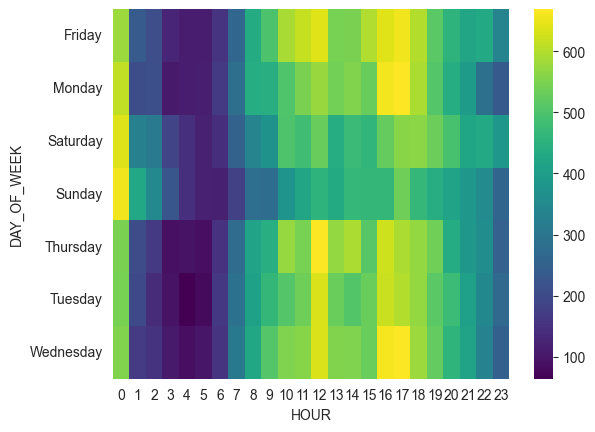

In [32]:
# Filter cleaned data and group by day of the week and hour. 
# Count the number of instances per day of week/ hour pairing.

dayHour = cleaned_data.groupby(by=['DAY_OF_WEEK', 'HOUR']).count()['INCIDENT_NUMBER'].unstack()
sns.heatmap(dayHour, cmap='viridis')


Looking at the number of incidents for each hour of the day, the most number of incidents occur between the 12:00 - 18:00 across all days of the week. 

<AxesSubplot:xlabel='MONTH', ylabel='DAY_OF_WEEK'>

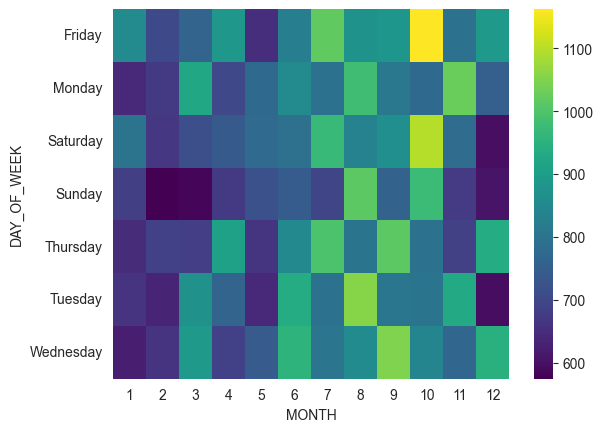

In [34]:
# Filter cleaned data and group by day of the week and month. 
# Count the number of instances per day of week/ month pairing.
dayMonth = cleaned_data.groupby(by=['DAY_OF_WEEK','MONTH']).count()['INCIDENT_NUMBER'].unstack()
sns.heatmap(dayMonth, cmap='viridis')

Looking at the number of incidents for each day of the week per month, the most incidents occur during Fridays in October. 

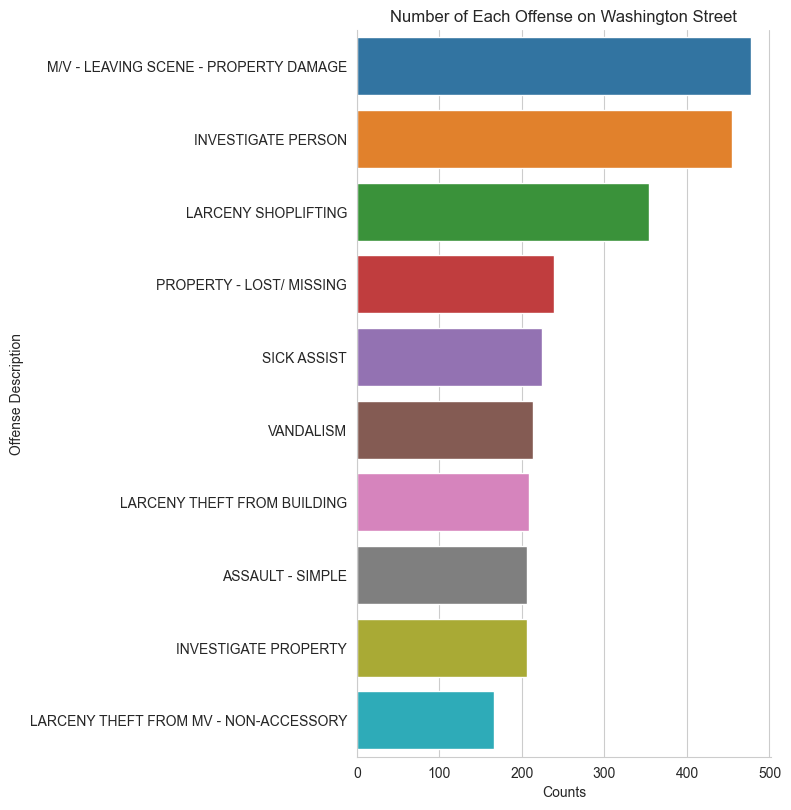

In [50]:
# Set the style and font scale
sns.set_style("whitegrid")

# Filter cleaned data for Washington Street and count offenses
washington_st = cleaned_data.loc[cleaned_data['STREET'] == 'WASHINGTON ST']['OFFENSE_DESCRIPTION'].value_counts()[:10]

washington_st_df = washington_st.reset_index()
washington_st_df.columns = ['OFFENSE_DESCRIPTION', 'Counts']

# Plot top 10 offenses on Washington St in a bar chart
viz1 = sns.catplot(x='Counts', y='OFFENSE_DESCRIPTION', height=8, kind='bar', data=washington_st_df)

plt.title('Number of Each Offense on Washington Street')
plt.xlabel('Counts')
plt.ylabel('Offense Description')

plt.show()

Looking at the street with the most number of reported incidents - Washington Street. 
M/V - Leaving Scene - Property Damage is the higest reported crime on Washington Street. 